In [5]:
options(warn=-1)
library(igraph)
library(Matrix)
library(pracma)

## 4. Personalized PageRank

#### While the use of PageRank has proven very effective, the web’s rapid growth in size and diversity drives an increasing demand for greater flexibility in ranking. Ideally, each user should be able to define their own notion of importance for each individual query.

In [6]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

#### 4.(a) Suppose you have your own notion of importance. Your interest in a node is proportional to the node’s PageRank, because you totally rely upon Google to decide which website to visit (assume that these nodes represent websites). Again, use random walk on network generated in part 3 to simulate this personalized PageRank. Here the teleportation probability to each node is proportional to its PageRank (as opposed to the regular PageRank, where at teleportation, the chance of visiting all nodes are the same and equal to 1/N). Again, let the teleportation probability be equal to alpha = 0.15. Compare the results with 3(b).

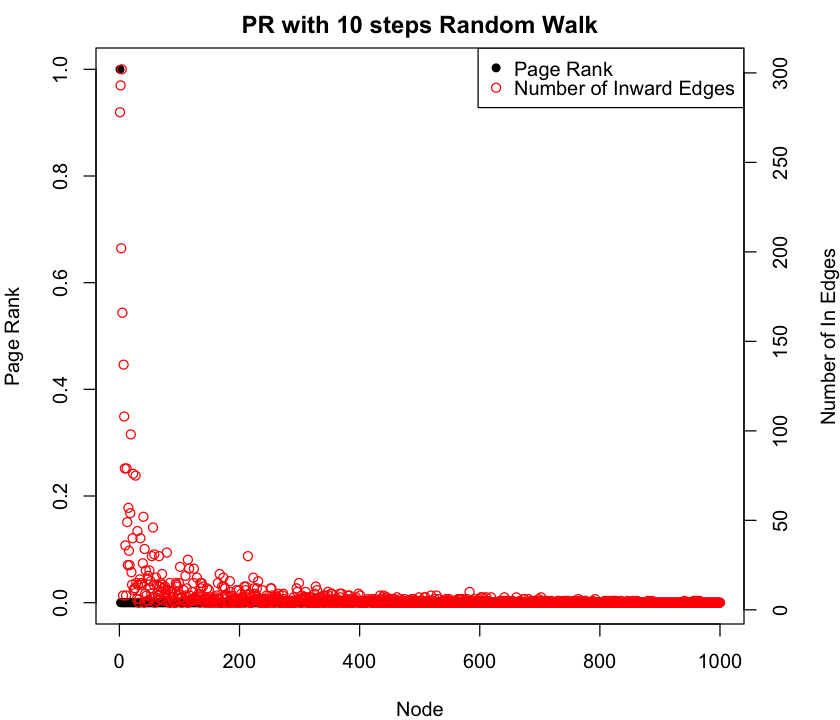

In [7]:
n <- 1000
maxSteps <- 10
teleport_p <- 0.15
trails <- 10000

## generate the graph with given parameter
g <- sample_pa(n, power = 1, m = 4, directed = TRUE)
g.degree <- degree(g, mode ="in")


## generate the transition matrix for 1 step
g.tMatrix <- create_transition_matrix(g)

## generate the transimition matrix for different number of steps
## jumpMatrix[i] inidcate the transmition matrix for i - 1 step
## jumpMatrix[1] is the identity matrix means that the page stays
## without no step is taken
jumpMatrix <- array(1, c(n, n, maxSteps))
jumpMatrix[, , 1] <- diag(n)
for (i in 2:maxSteps){
    jumpMatrix[, , i] = as.matrix(jumpMatrix[, , i - 1] %*% g.tMatrix)
}

## the initial PMF of the node being picked
Initial_state <- array(1/n, n)

## initiate the PageRank with 
PR_Density <- array(1/n, n)


TP_state <- array(1/n, n)
nodeVisitingCount <- array(0, n)

Tn <- rgeom(trails, 0.15)

for (jump in Tn){
    if(maxSteps >= jump + 1){
        PMF <- as.vector(PR_Density %*% jumpMatrix [, , jump + 1])
    } else {
        PMF <- as.vector(Initial_state %*% jumpMatrix [, , maxSteps])
    }
    lastNode <- sample(vcount(g), 1, prob = PMF)
    nodeVisitingCount[lastNode] = nodeVisitingCount[lastNode] + 1
    PR_Density <- nodeVisitingCount / sum(nodeVisitingCount)
}

options(repr.plot.width=7, repr.plot.height= 6)
par(mar = c(4,4,2,4))
plot(V(g), PR_Density, 
     main=sprintf("PR with %d steps Random Walk", maxSteps), xlab="Node", ylab="Page Rank", pch = 16)
par(new = T)
plot(V(g), degree(g), col ="red", axes=F, xlab=NA, ylab=NA, pch = 1)
axis(side = 4)
mtext(side = 4, line = 3, 'Number of In Edges')
legend("topright", legend=c("Page Rank", "Number of Inward Edges"),
       pch=c(16, 1), col=c("black", "red"))


#### 4.(b) Find two nodes in the network with median PageRanks. Repeat part (a) if teleportations land only on those two nodes (with probabilities 1/2, 1/2). How are the PageRank values affected?

[1] "The two teleporting nodes are: 957 715"


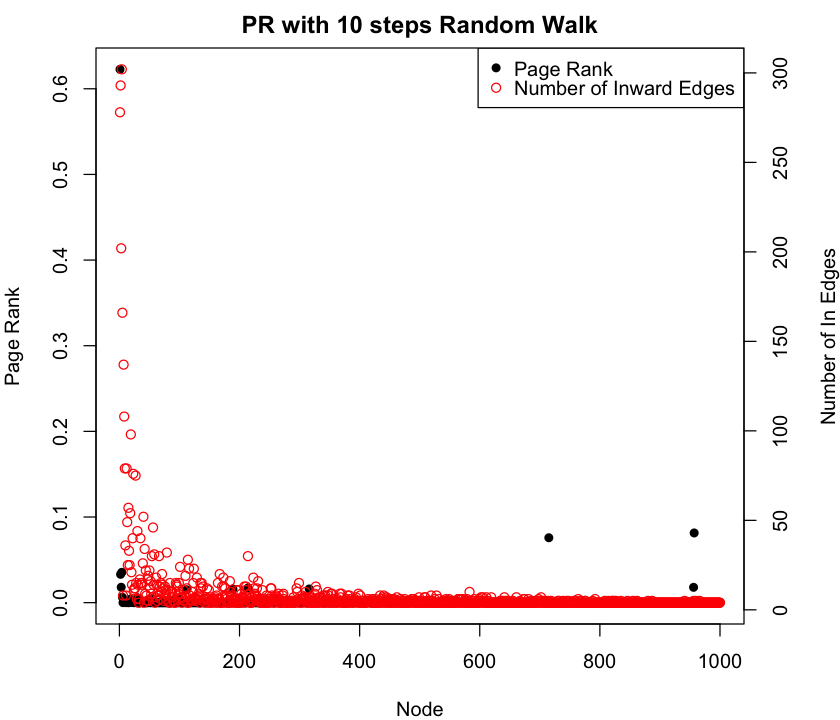

In [8]:
twoNodes <- sample(which(g.degree == median(g.degree)), 2, replace = FALSE)
print(sprintf("The two teleporting nodes are: %s %s", twoNodes[1], twoNodes[2]))

TP_state <- array(0, n)
TP_state[twoNodes] <- 0.5

nodeVisitingCount <- array(0, n)

Tn <- rgeom(trails, 0.15)

for (jump in Tn){
    if(maxSteps >= jump + 1){
        PMF <- as.vector(TP_state %*% jumpMatrix [, , jump + 1])
    } else {
        PMF <- as.vector(Initial_state %*% jumpMatrix [, , maxSteps])
    }
    lastNode <- sample(vcount(g), 1, prob = PMF)
    nodeVisitingCount[lastNode] = nodeVisitingCount[lastNode] + 1
    PR_Density <- nodeVisitingCount / sum(nodeVisitingCount)
}

options(repr.plot.width=7, repr.plot.height= 6)
par(mar = c(4,4,2,4))
plot(V(g), PR_Density, 
     main=sprintf("PR with %d steps Random Walk", maxSteps), xlab="Node", ylab="Page Rank", pch = 16)
par(new = T)
plot(V(g), degree(g), col ="red", axes=F, xlab=NA, ylab=NA, pch = 1)
axis(side = 4)
mtext(side = 4, line = 3, 'Number of In Edges')
legend("topright", legend=c("Page Rank", "Number of Inward Edges"),
       pch=c(16, 1), col=c("black", "red"))